# Project 3: Supervised Learning
## Stroke Prediction Classification Accuracy using Decision Trees
### by Amna Khalid

In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.tree import *
from sklearn.metrics import f1_score
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as plt1
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [127]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

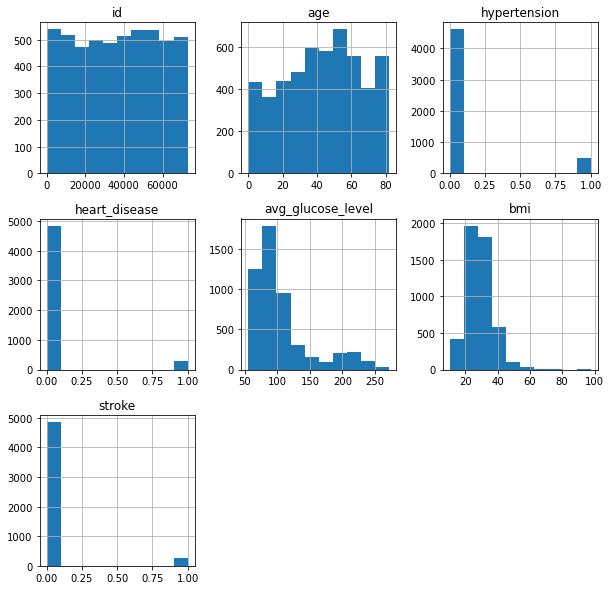

In [128]:
data.hist(figsize=(10,10))

In [129]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [130]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [131]:
data.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [132]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [133]:
def fig1():
    a = {1: 'Having Stroke', 0: 'Not Having Stroke'}
    x = data.copy()
    x['stroke'] = data['stroke'].map(a)
    g = x.groupby(['gender', 'stroke']).agg({'stroke': 'count'}).rename(columns = {'stroke': 'count'}).reset_index()
    y = plt1.sunburst(gender, path = ['gender', 'stroke'], values = 'count', color = 'gender', title = 'Affect of Age on Stroke', width = 600, height = 600)
    y.update_traces(textinfo = 'label + percent parent')
    y.show()

fig1()

In [134]:
def fig2():
    r = x.groupby(['Residence_type', 'stroke']).agg({'stroke': 'count'}).rename(columns = {'stroke': 'count'}).reset_index()
    y1 = plt1.sunburst(Residence_type, path = ['Residence_type', 'stroke'], values = 'count', color = 'Residence_type', title = 'Affect of Residence_type on Stroke', width = 600, height = 600)
    y1.update_traces(textinfo = 'label + percent parent')
    y1.show()
fig2()

In [135]:
def fig3():
    s = x.groupby(['smoking_status', 'stroke']).agg({'stroke': 'count'}).rename(columns = {'stroke': 'count'}).reset_index()
    y3 = plt1.sunburst(smoking_status, path = ['smoking_status', 'stroke'], values = 'count', color = 'smoking_status', title = 'Affect of smoking_status on Stroke', width = 600, height = 600)
    y3.update_traces(textinfo = 'label + percent parent')
    y3.show()
fig3()

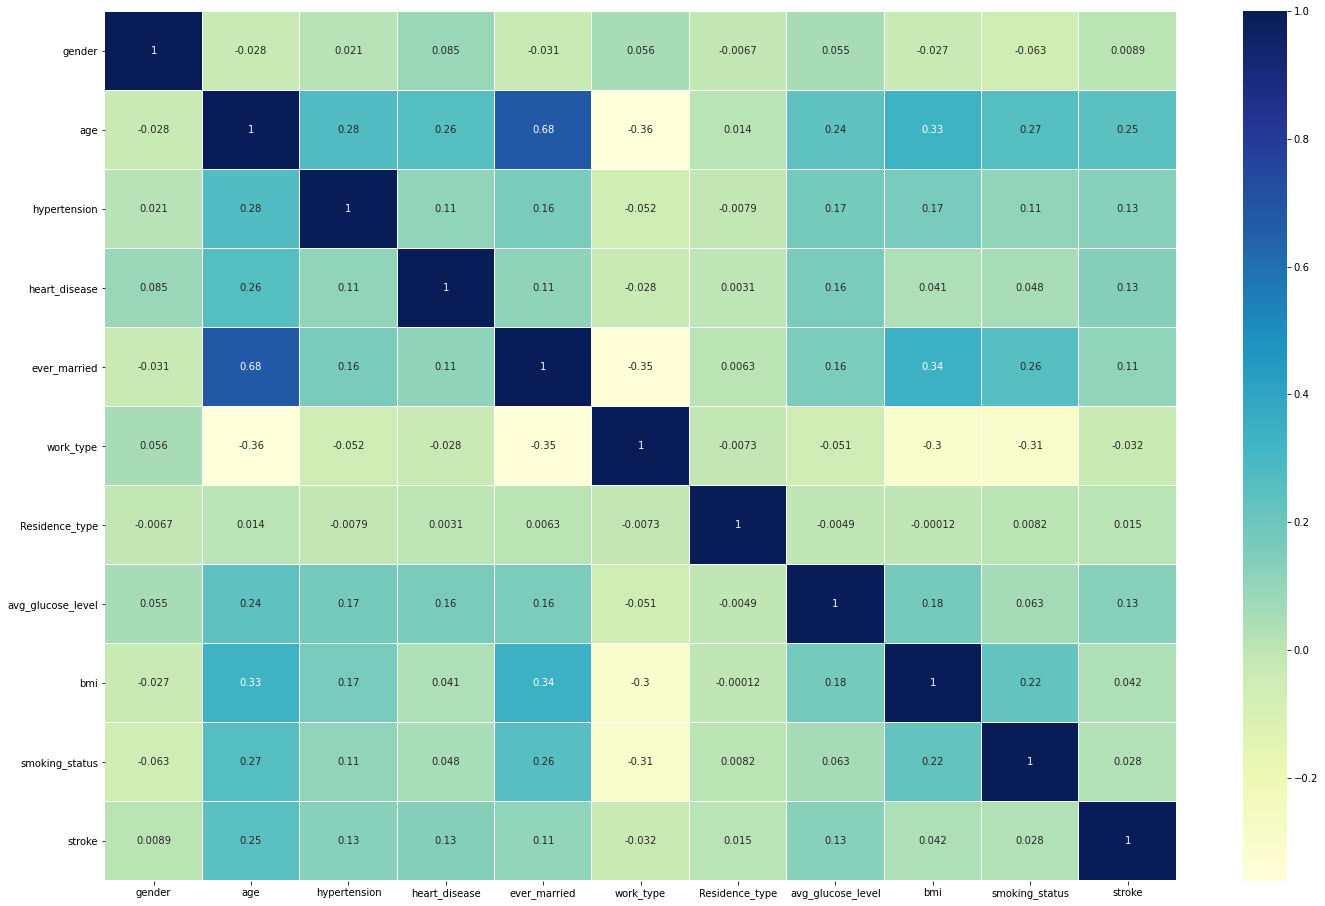

In [136]:
# Label Encoder for Categorical Features
def label_encoder(df):
    for i in c:
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])
    return df

def matrix():
    # Split feature as categorical and continuous features
    X = data.drop(['stroke','id'], axis = 1)
    y = data['stroke']
    c = X.select_dtypes(exclude=np.number).columns
    h = X.select_dtypes(include=[np.number,'float64','int64']).columns
    #Scaler for Continuous Features
    t = StandardScaler()
    X[h] = t.fit_transform(X[h])
    # Label encoding for Categorical Features
    X = label_encoder(X)
    X.head(3)
    u = X.join(y)
    o = u.corr(method='pearson')
    f, ax = plt.subplots(figsize=(24, 16))
    yy= sns.heatmap(o, ax=ax, cmap="YlGnBu", linewidths=0.1, annot=True)
    u.head()
matrix() 
#(Ivanmsiegfried, 2021)

In [137]:
s = ['gender','ever_married','Residence_type','smoking_status','work_type']
for i in s:
    jj = pd.get_dummies(data[i],drop_first=True,prefix=f"{i}_")
    data = pd.concat([data,jj],axis=1)

In [138]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender__Other,ever_married__Yes,Residence_type__Urban,smoking_status__formerly smoked,smoking_status__never smoked,smoking_status__smokes,work_type__Never_worked,work_type__Private,work_type__Self-employed,work_type__children
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,0,1,1,1,0,0,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,...,0,1,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,0,1,0,0,1,0,0,1,0,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,0,1,1,0,0,1,0,1,0,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,1,0,0,1,0,0,0,1,0


In [139]:
data = data.drop([*s,'id'],axis=1)

In [140]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender__Male,gender__Other,ever_married__Yes,Residence_type__Urban,smoking_status__formerly smoked,smoking_status__never smoked,smoking_status__smokes,work_type__Never_worked,work_type__Private,work_type__Self-employed,work_type__children
0,67.0,0,1,228.69,36.6,1,1,0,1,1,1,0,0,0,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,0,1,0,0,1,0,0
3,49.0,0,0,171.23,34.4,1,0,0,1,1,0,0,1,0,1,0,0
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [141]:
data.corrwith(data['stroke'])

age                                0.245257
hypertension                       0.127904
heart_disease                      0.134914
avg_glucose_level                  0.131945
bmi                                0.042374
stroke                             1.000000
gender__Male                       0.009117
gender__Other                     -0.003166
ever_married__Yes                  0.108340
Residence_type__Urban              0.015458
smoking_status__formerly smoked    0.064556
smoking_status__never smoked      -0.004129
smoking_status__smokes             0.008939
work_type__Never_worked           -0.014882
work_type__Private                 0.011888
work_type__Self-employed           0.062168
work_type__children               -0.083869
dtype: float64

In [142]:
X = data.drop('stroke',axis=1).values
y = data['stroke'].values

F1 score: 0.9097980262363825
F1 score: 0.9175856088493679
F1 score: 0.9063472827833724
F1 score: 0.9097980262363825
F1 score: 0.9182551485610586


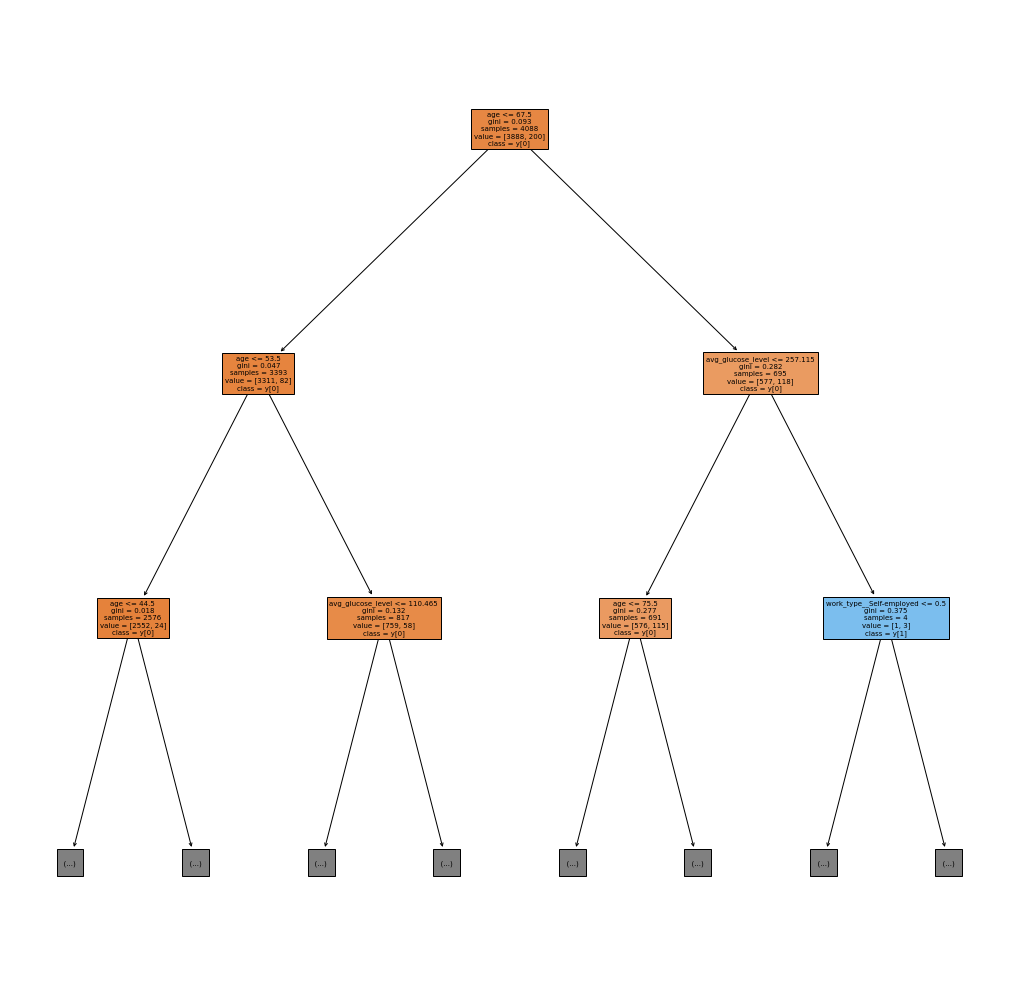

In [143]:
def treee():
    val = StratifiedKFold(n_splits=5)
    val.get_n_splits(X, y)
    for train, test in val.split(X, y):
        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]
        imputer = KNNImputer(n_neighbors=2)
        X_train = imputer.fit_transform(X_train)
        X_test = imputer.fit_transform(X_test)
        u = tree.DecisionTreeClassifier()
        u = u.fit(X_train, y_train)
        f = plt.figure(1,figsize=(18,18))
        f.set_figheight(18)
        f.set_figwidth(18)
        gg = tree.plot_tree(u,feature_names=data.drop('stroke',axis=1).columns,max_depth = 2,filled=True,class_names = True)
        y_pred = u.predict(X_test)
        f = f1_score(y_true = y_test , y_pred = y_pred,average = 'weighted')
        print('F1 score:', f)
        
treee()